# Project 1: Steam Games

Question: Find a correlation between price of a steam game & the percent of positive reviews

Is there any correlation between price & review score? People will tend to be easier on products that are cheaper so I want to see if that is at all true?

## Importing the Data

First I'll start by importing all of my libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

The dataset I had used is from Kaggle, it's a dataset found based on steam's current db

https://www.kaggle.com/datasets/srgiomanhes/steam-games-dataset-2025

This data set includes many aspects of each game,such as games name, but for now what Im interested is this: what genres it's listed under, its current review score as of Jan 27th 2025, and the price listed on steam. 

In [3]:
# next I'll import the dataset
df = pd.read_csv('steam_games.csv')

## Preprocessing

In [6]:
df.isnull().sum()

steam_appid            0
name                   0
developers             0
publishers             0
categories             0
genres                 0
required_age           0
n_achievements         0
platforms              0
is_released            0
release_date           0
additional_content     0
total_reviews          0
total_positive         0
total_negative         0
review_score           0
review_score_desc      0
positive_percentual    0
metacritic             0
is_free                0
price_initial (USD)    0
dtype: int64

The Data we currently have is very clean as it stands.

However, We really only need the game's genres, categories, its scores, and the price. We also want to make sure we only have games that have been released, as those that haven't cannot be scored on steam 

In [8]:
df

,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,...,additional_content,total_reviews,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD)
0,2719580,勇者の伝説の勇者,['ぽけそう'],['ぽけそう'],"['Single-player', 'Family Sharing']","['Casual', 'Indie']",0,0,['windows'],True,...,[],0,0,0,0.0,No user reviews,0.0,0,False,0.99
1,2719590,Light No Fire,['Hello Games'],['Hello Games'],"['Single-player', 'Multi-player', 'Co-op', 'On...","['Action', 'Adventure']",0,0,['windows'],False,...,[],0,0,0,0.0,No user reviews,0.0,0,False,0.00
2,2719600,Lorhaven: Cursed War,['GoldenGod Games'],['GoldenGod Games'],"['Single-player', 'Multi-player', 'PvP', 'Shar...","['RPG', 'Strategy']",0,32,"['windows', 'mac']",True,...,[],9,8,1,0.0,9 user reviews,88.9,0,False,9.99
3,2719610,PUIQ: Demons,['Giammnn'],['Giammnn'],"['Single-player', 'Steam Achievements', 'Famil...","['Action', 'Casual', 'Indie', 'RPG']",0,28,['windows'],True,...,[],0,0,0,0.0,No user reviews,0.0,0,False,2.99
4,2719650,Project XSTING,['Saucy Melon'],['Saucy Melon'],"['Single-player', 'Steam Achievements', 'Steam...","['Action', 'Casual', 'Indie', 'Early Access']",0,42,['windows'],True,...,[],9,9,0,0.0,9 user reviews,100.0,0,False,7.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71424,2294300,Touchdown Pinball,['Super PowerUp Games'],['Super PowerUp Games'],"['Single-player', 'Steam Achievements', 'Full ...",['Simulation'],0,15,['windows'],True,...,[],2,2,0,0.0,2 user reviews,100.0,0,False,2.99
71425,2294250,Speed Golf Royale,['Mainframe Games'],['Mainframe Games'],"['Single-player', 'Multi-player', 'PvP', 'Onli...","['Action', 'Casual', 'Indie', 'Massively Multi...",0,0,['windows'],False,...,[],0,0,0,0.0,No user reviews,0.0,0,False,0.00
71426,2294160,Isle of Swaps,['Fuzz Force'],['Fuzz Force'],"['Single-player', 'Steam Achievements', 'Steam...","['Indie', 'RPG', 'Strategy']",0,29,['windows'],True,...,[],72,66,6,8.0,Very Positive,91.7,0,False,14.99
71427,2294130,Goobies,['Knifes'],['Knifes'],"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Casual', 'Indie', 'RPG', 'Strategy']",0,43,['windows'],True,...,[],1442,1312,130,8.0,Very Positive,91.0,0,False,5.99


In [10]:
filtered_df = df[df['is_released'] == True]
filtered_df

,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,...,additional_content,total_reviews,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD)
0,2719580,勇者の伝説の勇者,['ぽけそう'],['ぽけそう'],"['Single-player', 'Family Sharing']","['Casual', 'Indie']",0,0,['windows'],True,...,[],0,0,0,0.0,No user reviews,0.0,0,False,0.99
2,2719600,Lorhaven: Cursed War,['GoldenGod Games'],['GoldenGod Games'],"['Single-player', 'Multi-player', 'PvP', 'Shar...","['RPG', 'Strategy']",0,32,"['windows', 'mac']",True,...,[],9,8,1,0.0,9 user reviews,88.9,0,False,9.99
3,2719610,PUIQ: Demons,['Giammnn'],['Giammnn'],"['Single-player', 'Steam Achievements', 'Famil...","['Action', 'Casual', 'Indie', 'RPG']",0,28,['windows'],True,...,[],0,0,0,0.0,No user reviews,0.0,0,False,2.99
4,2719650,Project XSTING,['Saucy Melon'],['Saucy Melon'],"['Single-player', 'Steam Achievements', 'Steam...","['Action', 'Casual', 'Indie', 'Early Access']",0,42,['windows'],True,...,[],9,9,0,0.0,9 user reviews,100.0,0,False,7.99
7,2719710,Manor Madness,['Apericot Studio'],['Apericot Studio'],"['Single-player', 'Steam Achievements', 'HDR a...","['Action', 'Adventure', 'Indie', 'RPG', 'Simul...",0,5,"['windows', 'mac', 'linux']",True,...,[],0,0,0,0.0,No user reviews,0.0,0,True,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71423,2294320,PIP XL,"[""Cute Hannah's Games""]","[""Cute Hannah's Games""]","['Single-player', 'Steam Achievements', 'Steam...","['Adventure', 'Casual', 'Indie', 'Simulation',...",0,100,['windows'],True,...,[],1,1,0,0.0,1 user reviews,100.0,0,False,1.99
71424,2294300,Touchdown Pinball,['Super PowerUp Games'],['Super PowerUp Games'],"['Single-player', 'Steam Achievements', 'Full ...",['Simulation'],0,15,['windows'],True,...,[],2,2,0,0.0,2 user reviews,100.0,0,False,2.99
71426,2294160,Isle of Swaps,['Fuzz Force'],['Fuzz Force'],"['Single-player', 'Steam Achievements', 'Steam...","['Indie', 'RPG', 'Strategy']",0,29,['windows'],True,...,[],72,66,6,8.0,Very Positive,91.7,0,False,14.99
71427,2294130,Goobies,['Knifes'],['Knifes'],"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Casual', 'Indie', 'RPG', 'Strategy']",0,43,['windows'],True,...,[],1442,1312,130,8.0,Very Positive,91.0,0,False,5.99


For the sake of a more consise set, I'll be limiting our data to that of games that have more than 1000 reviews but less than 20000 reviews

In [12]:
filtered_df = filtered_df[filtered_df['total_reviews'] >= 1000]
filtered_df = filtered_df[filtered_df['total_reviews'] <= 20000]

filtered_df

,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,...,additional_content,total_reviews,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD)
341,2707940,FPV Kamikaze Drone,['HFM Games'],['HFM Games'],"['Single-player', 'Multi-player', 'PvP', 'Onli...","['Action', 'Massively Multiplayer', 'Simulatio...",0,0,['windows'],True,...,[],1596,1363,233,8.0,Very Positive,85.4,0,False,3.99
2085,2653790,The Exit 8,['KOTAKE CREATE'],['KOTAKE CREATE'],"['Single-player', 'Full controller support', '...","['Adventure', 'Indie', 'Simulation']",0,2,['windows'],True,...,[],3443,3245,198,8.0,Very Positive,94.2,0,False,3.99
2092,2653940,Star Trek: Resurgence,['Dramatic Labs'],['Bruner House'],"['Single-player', 'Full controller support', '...",['Adventure'],0,27,['windows'],True,...,[],1320,1195,125,8.0,Very Positive,90.5,0,False,24.99
4569,2575900,Corn Kidz 64,['BogoSoft'],['BogoSoft'],"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Adventure', 'Indie']",0,15,['windows'],True,...,[],1124,1065,59,8.0,Very Positive,94.8,0,False,6.99
4804,2567870,Chained Together,['Anegar Games'],['Anegar Games'],"['Single-player', 'Multi-player', 'Co-op', 'On...","['Adventure', 'Casual', 'Indie', 'Simulation']",0,16,['windows'],True,...,[],16138,14865,1273,8.0,Very Positive,92.1,0,False,4.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71223,2273430,BlazBlue Entropy Effect,['91Act'],['91Act'],"['Single-player', 'Multi-player', 'Co-op', 'On...","['Action', 'Adventure', 'Indie']",0,43,"['windows', 'mac']",True,...,['BlazBlue Entropy Effect - Launch Exclusive C...,3031,2858,173,8.0,Very Positive,94.3,0,False,19.99
71257,2276930,Chillquarium,['Ben Reber'],['Ben Reber'],"['Single-player', 'Steam Achievements', 'Steam...","['Casual', 'Simulation']",0,18,"['windows', 'mac']",True,...,[],3850,3624,226,8.0,Very Positive,94.1,0,False,5.99
71345,2285150,The Front,['Samar Studio'],['Samar Studio'],"['Single-player', 'Multi-player', 'MMO', 'PvP'...","['Action', 'Indie', 'Massively Multiplayer', '...",0,0,['windows'],True,...,[],3290,2235,1055,5.0,Mixed,67.9,0,False,19.99
71404,2291760,Papa's Freezeria Deluxe,['Flipline Studios'],['Flipline Studios'],"['Single-player', 'Steam Achievements', 'Steam...","['Action', 'Casual', 'Indie', 'Simulation', 'S...",0,90,['windows'],True,...,[],7722,7661,61,9.0,Overwhelmingly Positive,99.2,0,False,5.99


## Visualization

In [14]:
filtered_df.groupby(['review_score_desc'])['price_initial (USD)'].mean()

review_score_desc
Mixed                      26.445899
Mostly Negative            22.993000
Mostly Positive            24.465660
Overwhelmingly Negative     7.492500
Overwhelmingly Positive    15.472168
Very Positive              20.302074
Name: price_initial (USD), dtype: float64

In [16]:
filtered_df.drop('required_age', axis = 1, inplace=True)
filtered_df.drop('n_achievements', axis = 1, inplace=True)
filtered_df.drop('steam_appid', axis = 1, inplace=True)
filtered_df

,name,developers,publishers,categories,genres,platforms,is_released,release_date,additional_content,total_reviews,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD)
341,FPV Kamikaze Drone,['HFM Games'],['HFM Games'],"['Single-player', 'Multi-player', 'PvP', 'Onli...","['Action', 'Massively Multiplayer', 'Simulatio...",['windows'],True,2023-12-15 00:00:00,[],1596,1363,233,8.0,Very Positive,85.4,0,False,3.99
2085,The Exit 8,['KOTAKE CREATE'],['KOTAKE CREATE'],"['Single-player', 'Full controller support', '...","['Adventure', 'Indie', 'Simulation']",['windows'],True,2023-11-29 00:00:00,[],3443,3245,198,8.0,Very Positive,94.2,0,False,3.99
2092,Star Trek: Resurgence,['Dramatic Labs'],['Bruner House'],"['Single-player', 'Full controller support', '...",['Adventure'],['windows'],True,2024-05-23 00:00:00,[],1320,1195,125,8.0,Very Positive,90.5,0,False,24.99
4569,Corn Kidz 64,['BogoSoft'],['BogoSoft'],"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Adventure', 'Indie']",['windows'],True,2023-10-16 00:00:00,[],1124,1065,59,8.0,Very Positive,94.8,0,False,6.99
4804,Chained Together,['Anegar Games'],['Anegar Games'],"['Single-player', 'Multi-player', 'Co-op', 'On...","['Adventure', 'Casual', 'Indie', 'Simulation']",['windows'],True,2024-06-19 00:00:00,[],16138,14865,1273,8.0,Very Positive,92.1,0,False,4.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71223,BlazBlue Entropy Effect,['91Act'],['91Act'],"['Single-player', 'Multi-player', 'Co-op', 'On...","['Action', 'Adventure', 'Indie']","['windows', 'mac']",True,2024-02-14 00:00:00,['BlazBlue Entropy Effect - Launch Exclusive C...,3031,2858,173,8.0,Very Positive,94.3,0,False,19.99
71257,Chillquarium,['Ben Reber'],['Ben Reber'],"['Single-player', 'Steam Achievements', 'Steam...","['Casual', 'Simulation']","['windows', 'mac']",True,2023-09-06 00:00:00,[],3850,3624,226,8.0,Very Positive,94.1,0,False,5.99
71345,The Front,['Samar Studio'],['Samar Studio'],"['Single-player', 'Multi-player', 'MMO', 'PvP'...","['Action', 'Indie', 'Massively Multiplayer', '...",['windows'],True,2023-10-11 00:00:00,[],3290,2235,1055,5.0,Mixed,67.9,0,False,19.99
71404,Papa's Freezeria Deluxe,['Flipline Studios'],['Flipline Studios'],"['Single-player', 'Steam Achievements', 'Steam...","['Action', 'Casual', 'Indie', 'Simulation', 'S...",['windows'],True,2023-03-31 00:00:00,[],7722,7661,61,9.0,Overwhelmingly Positive,99.2,0,False,5.99


Text(0.5, 1.0, 'Mean of Each Review Score description')

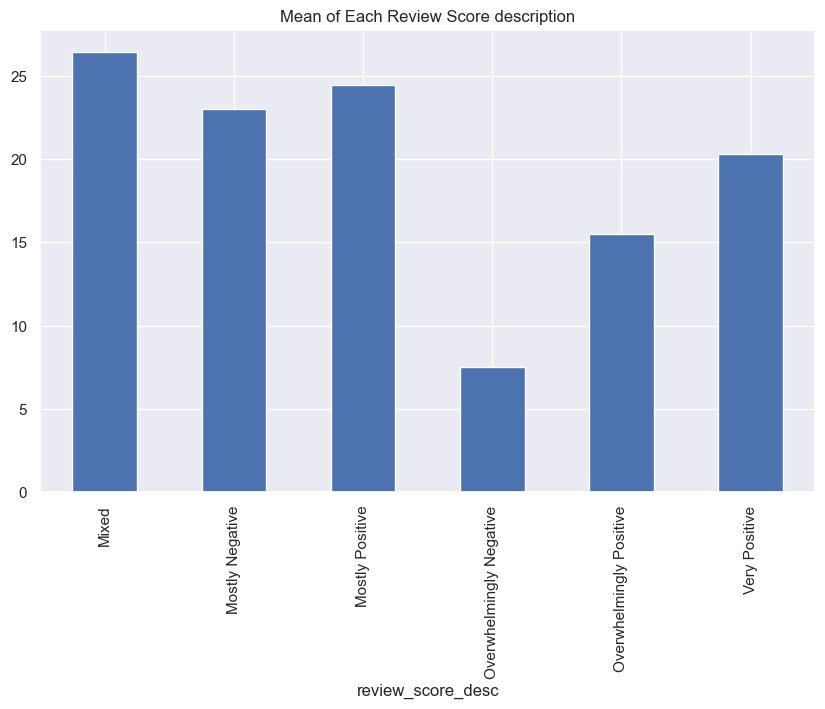

In [36]:
ax = filtered_df.groupby(['review_score_desc'])['price_initial (USD)'].mean().plot(kind='bar')
ax.set_title("Mean of Each Review Score description")

Text(0.5, 1.0, 'Price VS Positive Percentual')

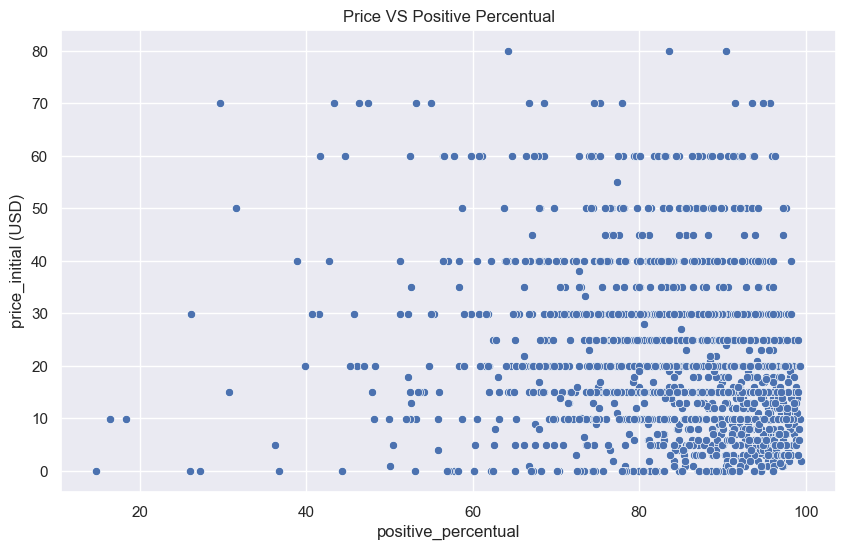

In [30]:
sb.set(rc={'figure.figsize':(10, 6)}) 
ax = sb.scatterplot(data = filtered_df, x='positive_percentual', y ='price_initial (USD)')
ax.set_title('Price VS Positive Percentual')

Text(0.5, 1.0, 'Positive Percentual VS Total Number of Reviews')

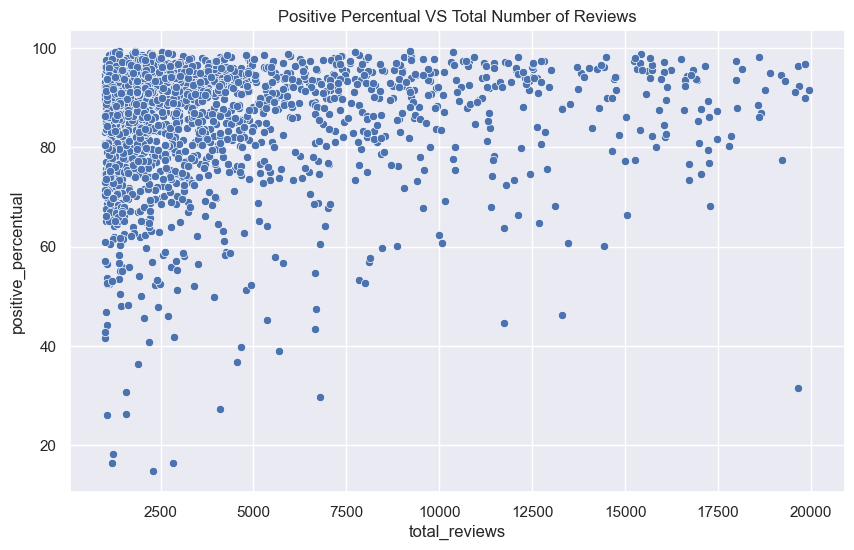

In [42]:
sb.set(rc={'figure.figsize':(10, 6)}) 
ax = sb.scatterplot(data = filtered_df, x='total_reviews', y ='positive_percentual')
ax.set_title('Positive Percentual VS Total Number of Reviews')

Right now the only thing our data tells us is that a lot of games with less reviews tend to score higher & that price does not have that big of an impact on the actual reviews. The graph also does follow a somewhat linear path; while a lot of games with less reviews do tend to score higher, the more reviews a game gets means its range of reviews gets smaller & smaller. 

While on average more expensive games fall under mixed, the difference between that, Mostly positive & mostly negative prices are very low. Overwhelmingly negative being the lowest average does surprise me somewhat as I'd expect more big budget games that didn't deliver to fall under there.


### Next lets take a look at the data split into 2 categories: Indie and Non-indie

The purpose of this is to see whether or not a game being indie has any significant impact on the results or not. Some indie games may be judged more harshly or may not have the hype given with something like a AAA game. I somewhat suspect that it will have a more varried results than the non-indie category but outside of that it's likely it'll have the same relation when it comes to positive & total reviews .

In [44]:
indie_df = filtered_df[filtered_df['genres'].str.contains('Indie')]
indie_df

,name,developers,publishers,categories,genres,platforms,is_released,release_date,additional_content,total_reviews,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD)
2085,The Exit 8,['KOTAKE CREATE'],['KOTAKE CREATE'],"['Single-player', 'Full controller support', '...","['Adventure', 'Indie', 'Simulation']",['windows'],True,2023-11-29 00:00:00,[],3443,3245,198,8.0,Very Positive,94.2,0,False,3.99
4569,Corn Kidz 64,['BogoSoft'],['BogoSoft'],"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Adventure', 'Indie']",['windows'],True,2023-10-16 00:00:00,[],1124,1065,59,8.0,Very Positive,94.8,0,False,6.99
4804,Chained Together,['Anegar Games'],['Anegar Games'],"['Single-player', 'Multi-player', 'Co-op', 'On...","['Adventure', 'Casual', 'Indie', 'Simulation']",['windows'],True,2024-06-19 00:00:00,[],16138,14865,1273,8.0,Very Positive,92.1,0,False,4.99
5935,SUMMERHOUSE,['Friedemann'],['Future Friends Games'],"['Single-player', 'Steam Achievements', 'Full ...","['Casual', 'Indie', 'Simulation', 'Strategy']","['windows', 'mac']",True,2024-03-08 00:00:00,[],1165,1103,62,8.0,Very Positive,94.7,0,False,4.99
6934,Fears to Fathom - Ironbark Lookout,['Rayll Studios'],['Rayll Studios'],"['Single-player', 'Steam Achievements', 'Famil...","['Adventure', 'Casual', 'Indie']",['windows'],True,2023-10-20 00:00:00,[],1994,1813,181,8.0,Very Positive,90.9,0,False,9.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71014,Kingdom Rush 5: Alliance TD,['Ironhide Game Studio'],['Ironhide Game Studio'],"['Single-player', 'Steam Achievements', 'Parti...","['Indie', 'Strategy']","['windows', 'mac']",True,2024-07-25 00:00:00,[],1279,1064,215,8.0,Very Positive,83.2,0,False,19.99
71223,BlazBlue Entropy Effect,['91Act'],['91Act'],"['Single-player', 'Multi-player', 'Co-op', 'On...","['Action', 'Adventure', 'Indie']","['windows', 'mac']",True,2024-02-14 00:00:00,['BlazBlue Entropy Effect - Launch Exclusive C...,3031,2858,173,8.0,Very Positive,94.3,0,False,19.99
71345,The Front,['Samar Studio'],['Samar Studio'],"['Single-player', 'Multi-player', 'MMO', 'PvP'...","['Action', 'Indie', 'Massively Multiplayer', '...",['windows'],True,2023-10-11 00:00:00,[],3290,2235,1055,5.0,Mixed,67.9,0,False,19.99
71404,Papa's Freezeria Deluxe,['Flipline Studios'],['Flipline Studios'],"['Single-player', 'Steam Achievements', 'Steam...","['Action', 'Casual', 'Indie', 'Simulation', 'S...",['windows'],True,2023-03-31 00:00:00,[],7722,7661,61,9.0,Overwhelmingly Positive,99.2,0,False,5.99


In [46]:
pub_df = filtered_df[filtered_df['genres'].str.contains('Indie') == False]
pub_df

,name,developers,publishers,categories,genres,platforms,is_released,release_date,additional_content,total_reviews,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD)
341,FPV Kamikaze Drone,['HFM Games'],['HFM Games'],"['Single-player', 'Multi-player', 'PvP', 'Onli...","['Action', 'Massively Multiplayer', 'Simulatio...",['windows'],True,2023-12-15 00:00:00,[],1596,1363,233,8.0,Very Positive,85.4,0,False,3.99
2092,Star Trek: Resurgence,['Dramatic Labs'],['Bruner House'],"['Single-player', 'Full controller support', '...",['Adventure'],['windows'],True,2024-05-23 00:00:00,[],1320,1195,125,8.0,Very Positive,90.5,0,False,24.99
5339,KINGDOM HEARTS -HD 1.5+2.5 ReMIX-,['Square Enix'],['Square Enix'],"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Adventure', 'RPG']",['windows'],True,2024-06-13 00:00:00,[],4415,3594,821,8.0,Very Positive,81.4,0,False,49.99
5743,Orbo's Odyssey,"['Feverdream Johnny', 'drurylain']",['Feverdream Softworks'],"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Adventure']",['windows'],True,2023-08-20 00:00:00,[],1105,1090,15,9.0,Overwhelmingly Positive,98.6,0,False,6.99
5907,Squirrel Stapler,['David Szymanski'],['David Szymanski'],"['Single-player', 'Steam Achievements', 'Full ...",['Action'],['windows'],True,2023-09-11 00:00:00,[],1207,1167,40,9.0,Overwhelmingly Positive,96.7,0,False,7.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70724,Football Manager 2023,['Sports Interactive'],['SEGA'],"['Single-player', 'Multi-player', 'Steam Achie...","['Simulation', 'Sports']","['windows', 'mac']",True,2022-11-08 00:00:00,[],5541,4940,601,8.0,Very Positive,89.2,0,False,0.00
70788,Command & Conquer™ Generals Zero Hour,['EA Los Angeles'],['Electronic Arts'],"['Single-player', 'Steam Cloud', 'Family Shari...","['Action', 'Strategy']",['windows'],True,2024-03-07 00:00:00,[],1862,1697,165,8.0,Very Positive,91.1,0,False,0.00
70828,Prince of Persia The Lost Crown,['Ubisoft Montpellier'],['Ubisoft'],"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Adventure']",['windows'],True,2024-08-08 00:00:00,['Prince of Persia The Lost Crown - Mask of Da...,1324,1146,178,8.0,Very Positive,86.6,85,False,39.99
70996,Avatar: Frontiers of Pandora™,['Massive Entertainment – A Ubisoft Studio'],['Ubisoft'],"['Single-player', 'Multi-player', 'Co-op', 'On...","['Action', 'Adventure']",['windows'],True,2024-06-17 00:00:00,"['Avatar: Frontiers of Pandora Season Pass', '...",1460,976,484,5.0,Mixed,66.8,0,False,69.99


The number of indie games seems to surpass the number of those not marked as such

Let us now see how they compare 

In [48]:
indie_df.groupby(['review_score_desc'])['price_initial (USD)'].mean()


review_score_desc
Mixed                      16.871194
Mostly Negative            28.323333
Mostly Positive            19.347559
Overwhelmingly Negative     9.990000
Overwhelmingly Positive    13.687184
Very Positive              16.651371
Name: price_initial (USD), dtype: float64

In [50]:
pub_df.groupby(['review_score_desc'])['price_initial (USD)'].mean()

review_score_desc
Mixed                      32.225225
Mostly Negative            20.708571
Mostly Positive            28.502919
Overwhelmingly Negative     4.995000
Overwhelmingly Positive    20.846522
Very Positive              26.118023
Name: price_initial (USD), dtype: float64

Text(0.5, 1.0, 'Mean of Each Review Score description (indie)')

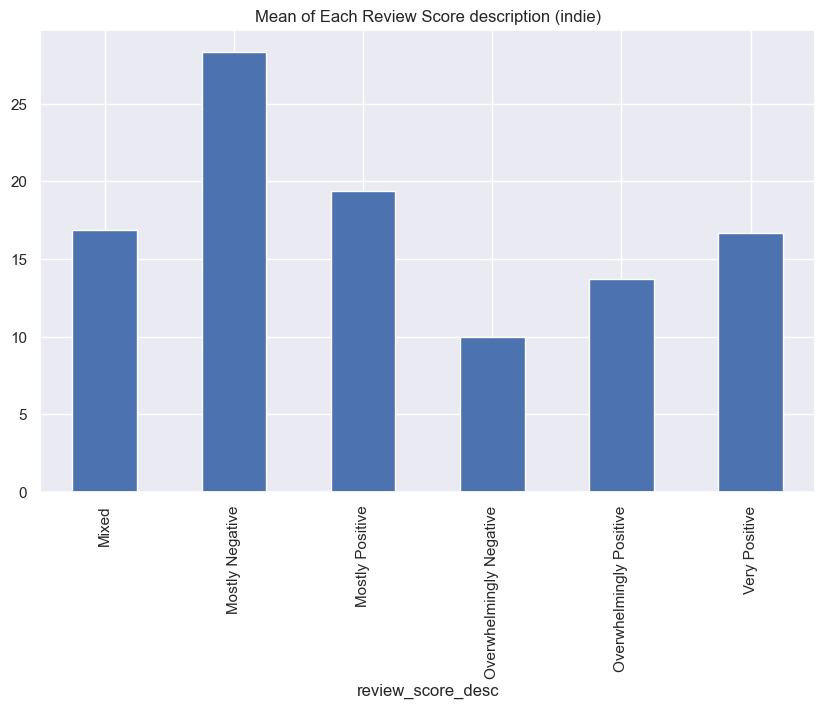

In [52]:
ax = indie_df.groupby(['review_score_desc'])['price_initial (USD)'].mean().plot(kind='bar')
ax.set_title('Mean of Each Review Score description (indie)')

Text(0.5, 1.0, 'Mean of Each Review Score description (Non-indie)')

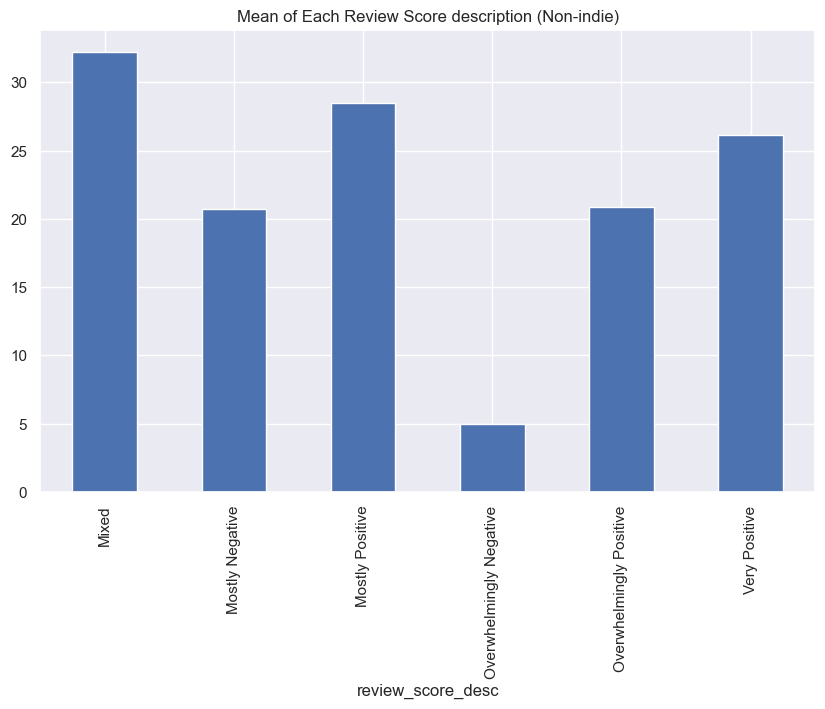

In [56]:
ax= pub_df.groupby(['review_score_desc'])['price_initial (USD)'].mean().plot(kind='bar')
ax.set_title('Mean of Each Review Score description (Non-indie)')

Interestingly enough, It seems like the indie game's have a more expensive games on average within their negative categories, while the one's not marked as such are more expensive in pretty much every other category

How price varries pretty much lines up with what I expected, Indie games having a larger range than AAA/games with a larger publisher.

Let's look at each of the categories graphs individually, looking first at the indie's 

<Axes: xlabel='positive_percentual', ylabel='price_initial (USD)'>

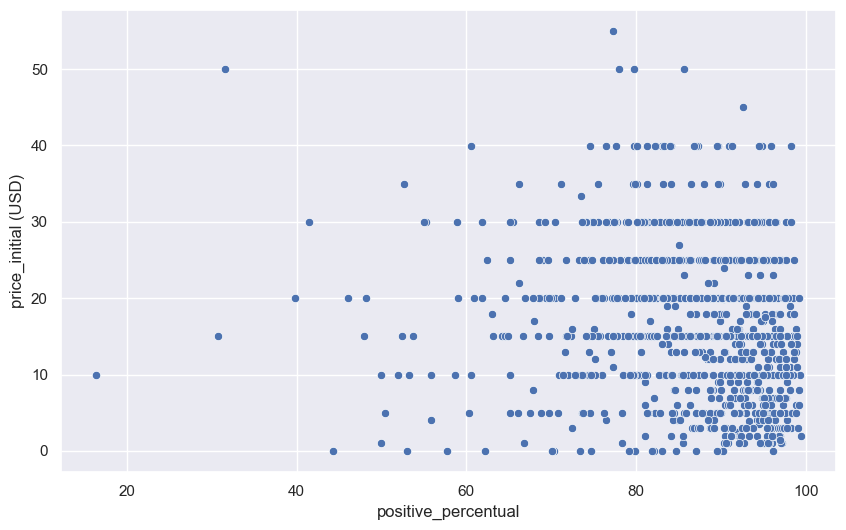

In [104]:
sb.set(rc={'figure.figsize':(10, 6)}) 
sb.scatterplot(data = indie_df, x='positive_percentual', y ='price_initial (USD)')

Again, it looks like a majority of games with a higher positive have a lower price

Text(0.5, 1.0, 'Indie')

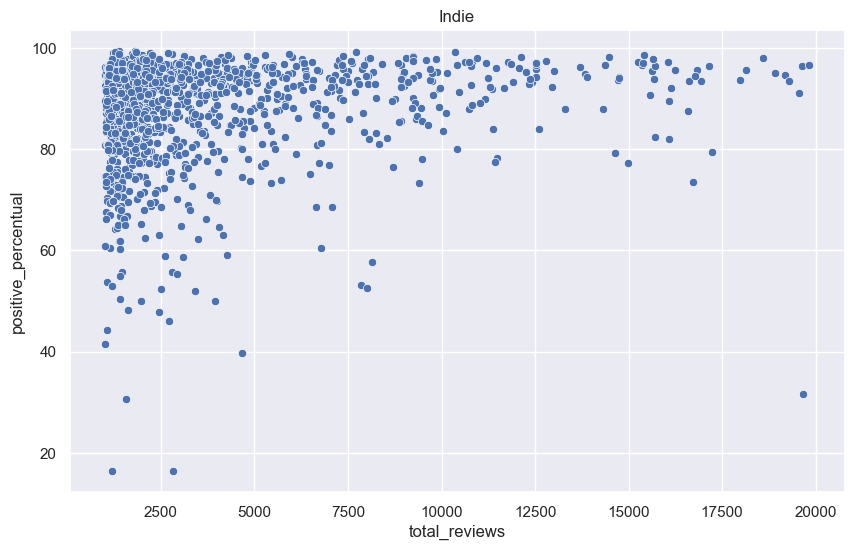

In [60]:
sb.set(rc={'figure.figsize':(10, 6)}) 
ax = sb.scatterplot(data = indie_df, x='total_reviews', y ='positive_percentual')
ax.set_title('Indie')

It does follow the same general patern of our main dataset, seeing that a lot of points in the top left, while the actual range decreases as the total reviews increases (not counting outliers)  

Now let's see the Non-indies

<Axes: xlabel='positive_percentual', ylabel='price_initial (USD)'>

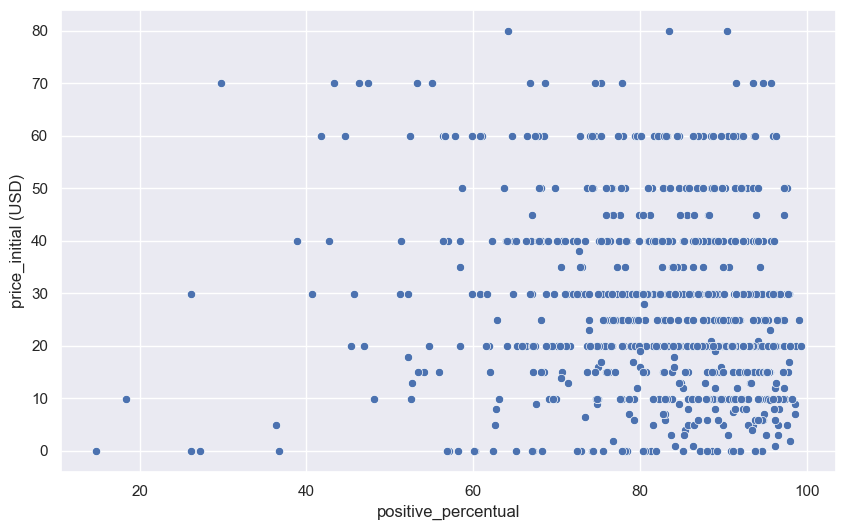

In [115]:
sb.set(rc={'figure.figsize':(10, 6)}) 
sb.scatterplot(data = pub_df, x='positive_percentual', y ='price_initial (USD)')

Text(0.5, 1.0, 'Non-indie')

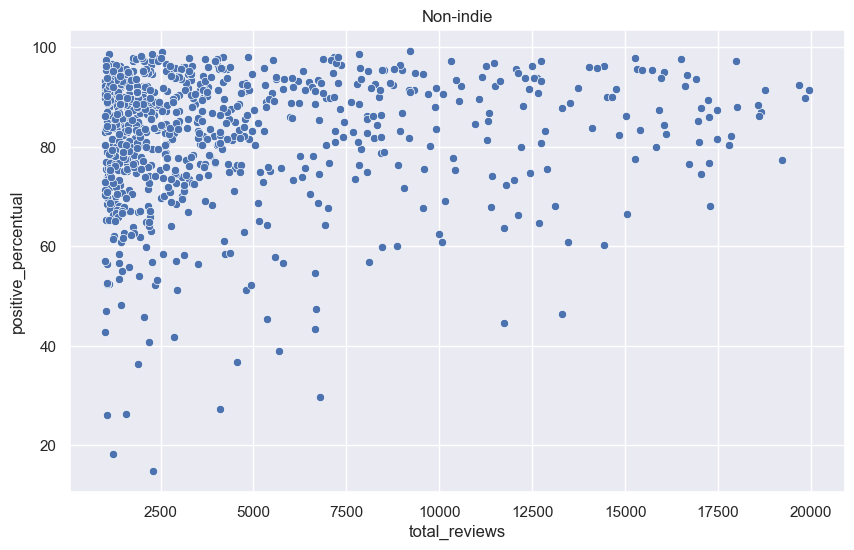

In [62]:
sb.set(rc={'figure.figsize':(10, 6)}) 
sb.scatterplot(data = pub_df, x='total_reviews', y ='positive_percentual').set_title('Non-indie')


While it this does line up pretty much with the indie graph, I do find it interesting how this graph looks a lot more linear than the indie one. Overall though the results are very similar